## Реализация укладки с помощью HV-подхода двоичного дерева

In [1]:
import networkx as nx
from dataclasses import dataclass
from matplotlib import pyplot
from operator import itemgetter
from typing import ClassVar
from typing import Dict
from typing import List
from typing import NoReturn
from typing import Optional
from typing import Tuple


@dataclass
class Coord:
    x:          int           = 0
    y:          int           = 0
    COORD_ATTR: ClassVar[str] = "coord"
        
    def copy(self, x: int = None, y: int = None):
        return Coord(x = x or self.x, y = y or self.y)


class TreeDrawer:
    def __init__(self, path: str):
        self.graph:    nx.classes.digraph.DiGraph = nx.read_graphml(path)
        self.pic_path: str                        = path.replace("xml", "png")
        
    def draw(self) -> NoReturn:
        self._set_nodes_coords()
        pyplot.figure(3, figsize=(12, 10))
        pyplot.gca().invert_yaxis()
        nx.draw(self.graph,  # примитивная отрисовка по рассчитанным координатам, ничем не отличается от matplotlib
                nx.get_node_attributes(self.graph, Coord.COORD_ATTR), 
                with_labels=True, 
                node_size=10)
        pyplot.savefig(self.pic_path)
        
    def _find_root(self) -> str:
        degree_list:     List[Tuple[str, int]] = list(dict(self.graph.in_degree()).items())
        found_root_name: str                   = sorted(degree_list, key=itemgetter(1))[0][0]
        return found_root_name
    
    def _traverse(self, node: str, node_coord: Coord) -> Coord:

        neighbors:     List[str] = list(self.graph.neighbors(node))
        neighbors_num: int       = len(neighbors)
        assert 0 <= neighbors_num <= 2 # only binary tree
            
        last_coord: Coord = node_coord.copy()

        if neighbors_num >= 1:
            inode:      int   = 0  # left neighbor
            last_coord: Coord = self._traverse(neighbors[inode], last_coord.copy(y = node_coord.y + 1))

        nx.set_node_attributes(self.graph, {node: (node_coord.x, node_coord.y)}, name=Coord.COORD_ATTR)

        if neighbors_num == 2:
            last_coord: Coord = node_coord.copy(x = last_coord.x + 1)
            inode:      int   = 1  # right neighbor
            last_coord: Coord = self._traverse(neighbors[inode], last_coord.copy(y = node_coord.y))

        return last_coord
        
    def _set_nodes_coords(self) -> NoReturn:
        self._traverse(self._find_root(), Coord())

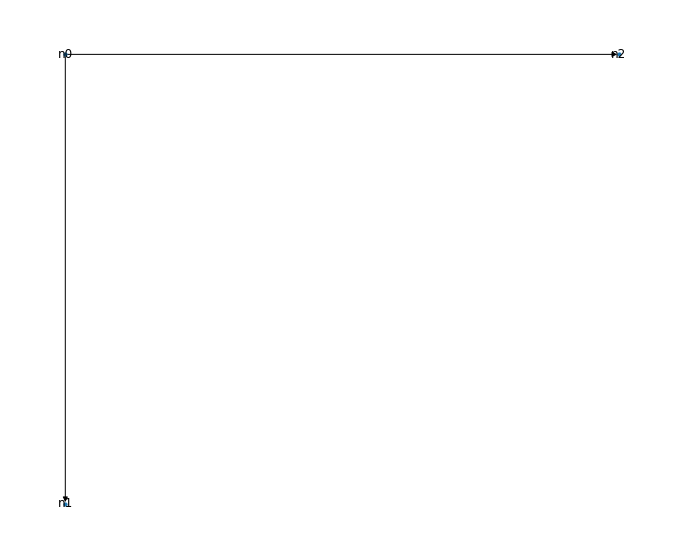

In [2]:
tree3nodes = """<?xml version="1.0" encoding="UTF-8"?>
<graphml xmlns="http://graphml.graphdrawing.org/xmlns"
  xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
  xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns
  http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd">
  <graph id="tree" edgedefault="directed">
    <node id="n0"/>
    <node id="n1"/>
    <node id="n2"/>
    <edge source="n0" target="n1"/>
    <edge source="n0" target="n2"/>
  </graph>
</graphml>
"""

path = 'tree3nodes.xml'

with open(path, 'w') as f:
    f.write(tree3nodes)
drawer = TreeDrawer(path)
drawer.draw()

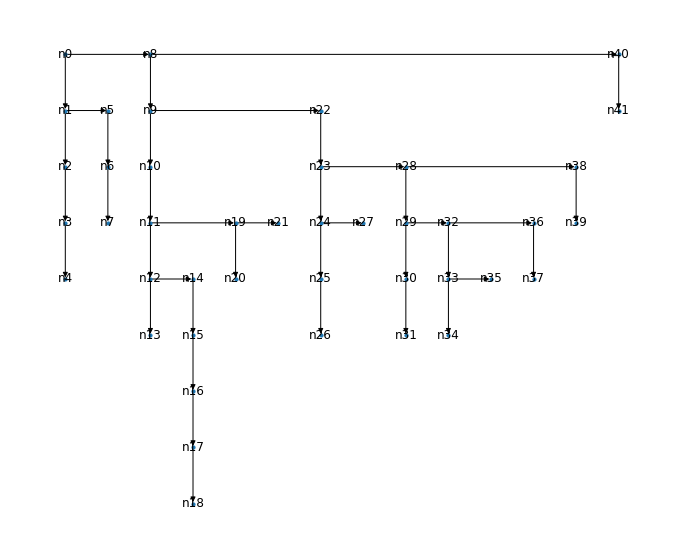

In [3]:
tree42nodes = """<?xml version="1.0" encoding="UTF-8"?>
<graphml xmlns="http://graphml.graphdrawing.org/xmlns"
  xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
  xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns
  http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd">
  <graph id="tree" edgedefault="directed">
    <node id="n0"/>
    <node id="n1"/>
    <node id="n2"/>
    <node id="n3"/>
    <node id="n4"/>
    <node id="n5"/>
    <node id="n6"/>
    <node id="n7"/>
    <node id="n8"/>
    <node id="n9"/>
    <node id="n10"/>
    <node id="n11"/>
    <node id="n12"/>
    <node id="n13"/>
    <node id="n14"/>
    <node id="n15"/>
    <node id="n16"/>
    <node id="n17"/>
    <node id="n18"/>
    <node id="n19"/>
    <node id="n20"/>
    <node id="n21"/>
    <node id="n22"/>
    <node id="n23"/>
    <node id="n24"/>
    <node id="n25"/>
    <node id="n26"/>
    <node id="n27"/>
    <node id="n28"/>
    <node id="n29"/>
    <node id="n30"/>
    <node id="n31"/>
    <node id="n32"/>
    <node id="n33"/>
    <node id="n34"/>
    <node id="n35"/>
    <node id="n36"/>
    <node id="n37"/>
    <node id="n38"/>
    <node id="n39"/>
    <node id="n40"/>
    <node id="n41"/>
    <edge source="n0" target="n1"/>
    <edge source="n0" target="n8"/>
    <edge source="n1" target="n2"/>
    <edge source="n1" target="n5"/>
    <edge source="n2" target="n3"/>
    <edge source="n3" target="n4"/>
    <edge source="n5" target="n6"/>
    <edge source="n6" target="n7"/>
    <edge source="n8" target="n9"/>
    <edge source="n8" target="n40"/>
    <edge source="n9" target="n10"/>
    <edge source="n9" target="n22"/>
    <edge source="n10" target="n11"/>
    <edge source="n11" target="n12"/>
    <edge source="n11" target="n19"/>
    <edge source="n12" target="n13"/>
    <edge source="n12" target="n14"/>
    <edge source="n14" target="n15"/>
    <edge source="n15" target="n16"/>
    <edge source="n16" target="n17"/>
    <edge source="n17" target="n18"/>
    <edge source="n19" target="n20"/>
    <edge source="n19" target="n21"/>
    <edge source="n22" target="n23"/>
    <edge source="n23" target="n24"/>
    <edge source="n23" target="n28"/>
    <edge source="n24" target="n25"/>
    <edge source="n24" target="n27"/>
    <edge source="n25" target="n26"/>
    <edge source="n28" target="n29"/>
    <edge source="n28" target="n38"/>
    <edge source="n29" target="n30"/>
    <edge source="n29" target="n32"/>
    <edge source="n30" target="n31"/>
    <edge source="n32" target="n33"/>
    <edge source="n32" target="n36"/>
    <edge source="n33" target="n34"/>
    <edge source="n33" target="n35"/>
    <edge source="n36" target="n37"/>
    <edge source="n38" target="n39"/>
    <edge source="n40" target="n41"/>
  </graph>
</graphml>"""

path = 'tree42nodes.xml'

with open(path, 'w') as f:
    f.write(tree42nodes)
drawer = TreeDrawer(path)
drawer.draw()

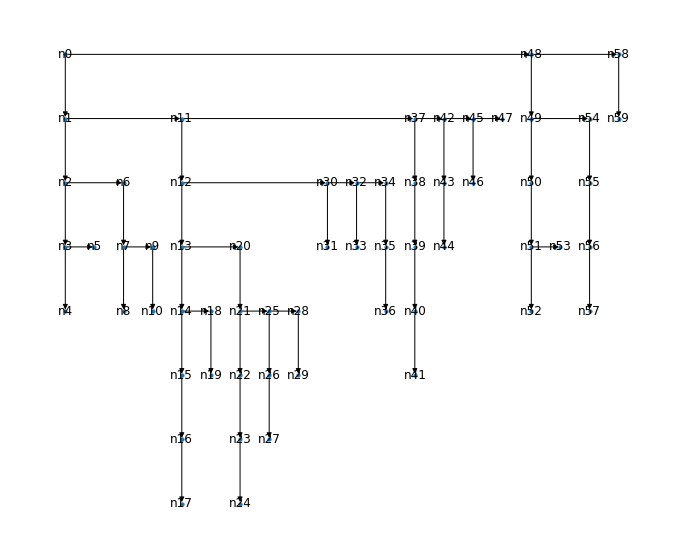

In [4]:
tree60nodes = """<?xml version="1.0" encoding="UTF-8"?>
<graphml xmlns="http://graphml.graphdrawing.org/xmlns"
  xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
  xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns
  http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd">
  <graph id="tree" edgedefault="directed">
    <node id="n0"/>
    <node id="n1"/>
    <node id="n2"/>
    <node id="n3"/>
    <node id="n4"/>
    <node id="n5"/>
    <node id="n6"/>
    <node id="n7"/>
    <node id="n8"/>
    <node id="n9"/>
    <node id="n10"/>
    <node id="n11"/>
    <node id="n12"/>
    <node id="n13"/>
    <node id="n14"/>
    <node id="n15"/>
    <node id="n16"/>
    <node id="n17"/>
    <node id="n18"/>
    <node id="n19"/>
    <node id="n20"/>
    <node id="n21"/>
    <node id="n22"/>
    <node id="n23"/>
    <node id="n24"/>
    <node id="n25"/>
    <node id="n26"/>
    <node id="n27"/>
    <node id="n28"/>
    <node id="n29"/>
    <node id="n30"/>
    <node id="n31"/>
    <node id="n32"/>
    <node id="n33"/>
    <node id="n34"/>
    <node id="n35"/>
    <node id="n36"/>
    <node id="n37"/>
    <node id="n38"/>
    <node id="n39"/>
    <node id="n40"/>
    <node id="n41"/>
    <node id="n42"/>
    <node id="n43"/>
    <node id="n44"/>
    <node id="n45"/>
    <node id="n46"/>
    <node id="n47"/>
    <node id="n48"/>
    <node id="n49"/>
    <node id="n50"/>
    <node id="n51"/>
    <node id="n52"/>
    <node id="n53"/>
    <node id="n54"/>
    <node id="n55"/>
    <node id="n56"/>
    <node id="n57"/>
    <node id="n58"/>
    <node id="n59"/>
    <edge source="n0" target="n1"/>
    <edge source="n0" target="n48"/>
    <edge source="n1" target="n2"/>
    <edge source="n1" target="n11"/>
    <edge source="n2" target="n3"/>
    <edge source="n2" target="n6"/>
    <edge source="n3" target="n4"/>
    <edge source="n3" target="n5"/>
    <edge source="n6" target="n7"/>
    <edge source="n7" target="n8"/>
    <edge source="n7" target="n9"/>
    <edge source="n9" target="n10"/>
    <edge source="n11" target="n12"/>
    <edge source="n11" target="n37"/>
    <edge source="n12" target="n13"/>
    <edge source="n12" target="n30"/>
    <edge source="n13" target="n14"/>
    <edge source="n13" target="n20"/>
    <edge source="n14" target="n15"/>
    <edge source="n14" target="n18"/>
    <edge source="n15" target="n16"/>
    <edge source="n16" target="n17"/>
    <edge source="n18" target="n19"/>
    <edge source="n20" target="n21"/>
    <edge source="n21" target="n22"/>
    <edge source="n21" target="n25"/>
    <edge source="n22" target="n23"/>
    <edge source="n23" target="n24"/>
    <edge source="n25" target="n26"/>
    <edge source="n25" target="n28"/>
    <edge source="n26" target="n27"/>
    <edge source="n28" target="n29"/>
    <edge source="n30" target="n31"/>
    <edge source="n30" target="n32"/>
    <edge source="n32" target="n33"/>
    <edge source="n32" target="n34"/>
    <edge source="n34" target="n35"/>
    <edge source="n35" target="n36"/>
    <edge source="n37" target="n38"/>
    <edge source="n37" target="n42"/>
    <edge source="n38" target="n39"/>
    <edge source="n39" target="n40"/>
    <edge source="n40" target="n41"/>
    <edge source="n42" target="n43"/>
    <edge source="n42" target="n45"/>
    <edge source="n43" target="n44"/>
    <edge source="n45" target="n46"/>
    <edge source="n45" target="n47"/>
    <edge source="n48" target="n49"/>
    <edge source="n48" target="n58"/>
    <edge source="n49" target="n50"/>
    <edge source="n49" target="n54"/>
    <edge source="n50" target="n51"/>
    <edge source="n51" target="n52"/>
    <edge source="n51" target="n53"/>
    <edge source="n54" target="n55"/>
    <edge source="n55" target="n56"/>
    <edge source="n56" target="n57"/>
    <edge source="n58" target="n59"/>
  </graph>
</graphml>
"""

path = 'tree60nodes.xml'

with open(path, 'w') as f:
    f.write(tree60nodes)
drawer = TreeDrawer(path)
drawer.draw()

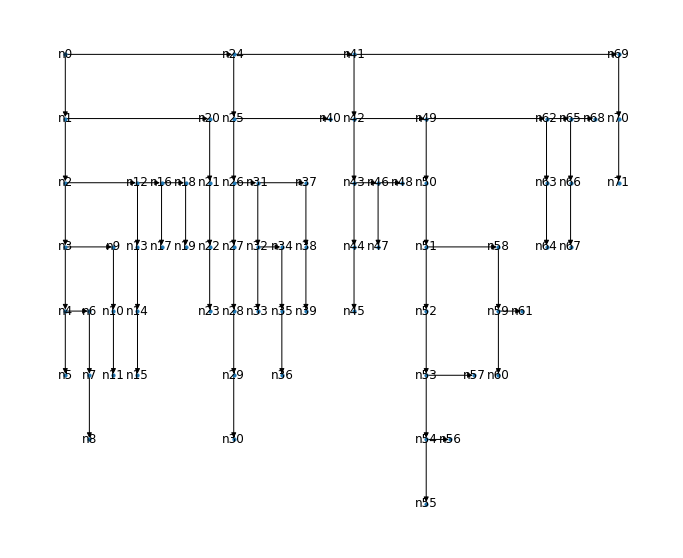

In [5]:
tree72nodes = """<?xml version="1.0" encoding="UTF-8"?>
<graphml xmlns="http://graphml.graphdrawing.org/xmlns"
  xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
  xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns
  http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd">
  <graph id="tree" edgedefault="directed">
    <node id="n0"/>
    <node id="n1"/>
    <node id="n2"/>
    <node id="n3"/>
    <node id="n4"/>
    <node id="n5"/>
    <node id="n6"/>
    <node id="n7"/>
    <node id="n8"/>
    <node id="n9"/>
    <node id="n10"/>
    <node id="n11"/>
    <node id="n12"/>
    <node id="n13"/>
    <node id="n14"/>
    <node id="n15"/>
    <node id="n16"/>
    <node id="n17"/>
    <node id="n18"/>
    <node id="n19"/>
    <node id="n20"/>
    <node id="n21"/>
    <node id="n22"/>
    <node id="n23"/>
    <node id="n24"/>
    <node id="n25"/>
    <node id="n26"/>
    <node id="n27"/>
    <node id="n28"/>
    <node id="n29"/>
    <node id="n30"/>
    <node id="n31"/>
    <node id="n32"/>
    <node id="n33"/>
    <node id="n34"/>
    <node id="n35"/>
    <node id="n36"/>
    <node id="n37"/>
    <node id="n38"/>
    <node id="n39"/>
    <node id="n40"/>
    <node id="n41"/>
    <node id="n42"/>
    <node id="n43"/>
    <node id="n44"/>
    <node id="n45"/>
    <node id="n46"/>
    <node id="n47"/>
    <node id="n48"/>
    <node id="n49"/>
    <node id="n50"/>
    <node id="n51"/>
    <node id="n52"/>
    <node id="n53"/>
    <node id="n54"/>
    <node id="n55"/>
    <node id="n56"/>
    <node id="n57"/>
    <node id="n58"/>
    <node id="n59"/>
    <node id="n60"/>
    <node id="n61"/>
    <node id="n62"/>
    <node id="n63"/>
    <node id="n64"/>
    <node id="n65"/>
    <node id="n66"/>
    <node id="n67"/>
    <node id="n68"/>
    <node id="n69"/>
    <node id="n70"/>
    <node id="n71"/>
    <edge source="n0" target="n1"/>
    <edge source="n0" target="n24"/>
    <edge source="n1" target="n2"/>
    <edge source="n1" target="n20"/>
    <edge source="n2" target="n3"/>
    <edge source="n2" target="n12"/>
    <edge source="n3" target="n4"/>
    <edge source="n3" target="n9"/>
    <edge source="n4" target="n5"/>
    <edge source="n4" target="n6"/>
    <edge source="n6" target="n7"/>
    <edge source="n7" target="n8"/>
    <edge source="n9" target="n10"/>
    <edge source="n10" target="n11"/>
    <edge source="n12" target="n13"/>
    <edge source="n12" target="n16"/>
    <edge source="n13" target="n14"/>
    <edge source="n14" target="n15"/>
    <edge source="n16" target="n17"/>
    <edge source="n16" target="n18"/>
    <edge source="n18" target="n19"/>
    <edge source="n20" target="n21"/>
    <edge source="n21" target="n22"/>
    <edge source="n22" target="n23"/>
    <edge source="n24" target="n25"/>
    <edge source="n24" target="n41"/>
    <edge source="n25" target="n26"/>
    <edge source="n25" target="n40"/>
    <edge source="n26" target="n27"/>
    <edge source="n26" target="n31"/>
    <edge source="n27" target="n28"/>
    <edge source="n28" target="n29"/>
    <edge source="n29" target="n30"/>
    <edge source="n31" target="n32"/>
    <edge source="n31" target="n37"/>
    <edge source="n32" target="n33"/>
    <edge source="n32" target="n34"/>
    <edge source="n34" target="n35"/>
    <edge source="n35" target="n36"/>
    <edge source="n37" target="n38"/>
    <edge source="n38" target="n39"/>
    <edge source="n41" target="n42"/>
    <edge source="n41" target="n69"/>
    <edge source="n42" target="n43"/>
    <edge source="n42" target="n49"/>
    <edge source="n43" target="n44"/>
    <edge source="n43" target="n46"/>
    <edge source="n44" target="n45"/>
    <edge source="n46" target="n47"/>
    <edge source="n46" target="n48"/>
    <edge source="n49" target="n50"/>
    <edge source="n49" target="n62"/>
    <edge source="n50" target="n51"/>
    <edge source="n51" target="n52"/>
    <edge source="n51" target="n58"/>
    <edge source="n52" target="n53"/>
    <edge source="n53" target="n54"/>
    <edge source="n53" target="n57"/>
    <edge source="n54" target="n55"/>
    <edge source="n54" target="n56"/>
    <edge source="n58" target="n59"/>
    <edge source="n59" target="n60"/>
    <edge source="n59" target="n61"/>
    <edge source="n62" target="n63"/>
    <edge source="n62" target="n65"/>
    <edge source="n63" target="n64"/>
    <edge source="n65" target="n66"/>
    <edge source="n65" target="n68"/>
    <edge source="n66" target="n67"/>
    <edge source="n69" target="n70"/>
    <edge source="n70" target="n71"/>
  </graph>
</graphml>"""

path = 'tree72nodes.xml'

with open(path, 'w') as f:
    f.write(tree72nodes)
drawer = TreeDrawer(path)
drawer.draw()

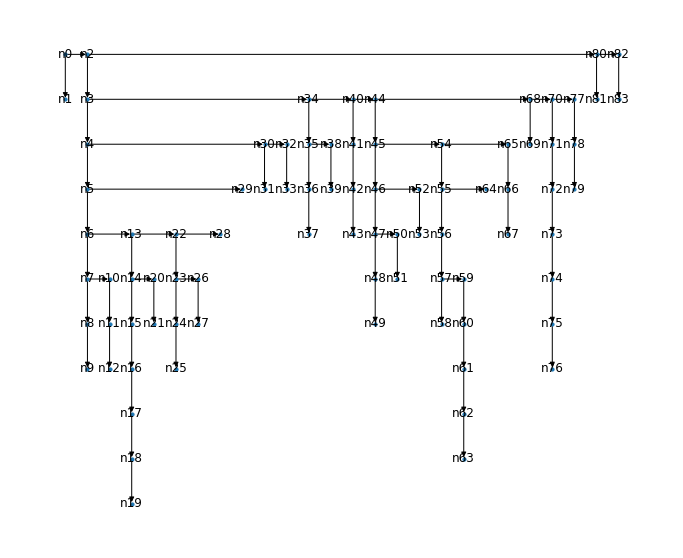

In [6]:
tree84nodes = """<?xml version="1.0" encoding="UTF-8"?>
<graphml xmlns="http://graphml.graphdrawing.org/xmlns"
  xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
  xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns
  http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd">
  <graph id="tree" edgedefault="directed">
    <node id="n0"/>
    <node id="n1"/>
    <node id="n2"/>
    <node id="n3"/>
    <node id="n4"/>
    <node id="n5"/>
    <node id="n6"/>
    <node id="n7"/>
    <node id="n8"/>
    <node id="n9"/>
    <node id="n10"/>
    <node id="n11"/>
    <node id="n12"/>
    <node id="n13"/>
    <node id="n14"/>
    <node id="n15"/>
    <node id="n16"/>
    <node id="n17"/>
    <node id="n18"/>
    <node id="n19"/>
    <node id="n20"/>
    <node id="n21"/>
    <node id="n22"/>
    <node id="n23"/>
    <node id="n24"/>
    <node id="n25"/>
    <node id="n26"/>
    <node id="n27"/>
    <node id="n28"/>
    <node id="n29"/>
    <node id="n30"/>
    <node id="n31"/>
    <node id="n32"/>
    <node id="n33"/>
    <node id="n34"/>
    <node id="n35"/>
    <node id="n36"/>
    <node id="n37"/>
    <node id="n38"/>
    <node id="n39"/>
    <node id="n40"/>
    <node id="n41"/>
    <node id="n42"/>
    <node id="n43"/>
    <node id="n44"/>
    <node id="n45"/>
    <node id="n46"/>
    <node id="n47"/>
    <node id="n48"/>
    <node id="n49"/>
    <node id="n50"/>
    <node id="n51"/>
    <node id="n52"/>
    <node id="n53"/>
    <node id="n54"/>
    <node id="n55"/>
    <node id="n56"/>
    <node id="n57"/>
    <node id="n58"/>
    <node id="n59"/>
    <node id="n60"/>
    <node id="n61"/>
    <node id="n62"/>
    <node id="n63"/>
    <node id="n64"/>
    <node id="n65"/>
    <node id="n66"/>
    <node id="n67"/>
    <node id="n68"/>
    <node id="n69"/>
    <node id="n70"/>
    <node id="n71"/>
    <node id="n72"/>
    <node id="n73"/>
    <node id="n74"/>
    <node id="n75"/>
    <node id="n76"/>
    <node id="n77"/>
    <node id="n78"/>
    <node id="n79"/>
    <node id="n80"/>
    <node id="n81"/>
    <node id="n82"/>
    <node id="n83"/>
    <edge source="n0" target="n1"/>
    <edge source="n0" target="n2"/>
    <edge source="n2" target="n3"/>
    <edge source="n2" target="n80"/>
    <edge source="n3" target="n4"/>
    <edge source="n3" target="n34"/>
    <edge source="n4" target="n5"/>
    <edge source="n4" target="n30"/>
    <edge source="n5" target="n6"/>
    <edge source="n5" target="n29"/>
    <edge source="n6" target="n7"/>
    <edge source="n6" target="n13"/>
    <edge source="n7" target="n8"/>
    <edge source="n7" target="n10"/>
    <edge source="n8" target="n9"/>
    <edge source="n10" target="n11"/>
    <edge source="n11" target="n12"/>
    <edge source="n13" target="n14"/>
    <edge source="n13" target="n22"/>
    <edge source="n14" target="n15"/>
    <edge source="n14" target="n20"/>
    <edge source="n15" target="n16"/>
    <edge source="n16" target="n17"/>
    <edge source="n17" target="n18"/>
    <edge source="n18" target="n19"/>
    <edge source="n20" target="n21"/>
    <edge source="n22" target="n23"/>
    <edge source="n22" target="n28"/>
    <edge source="n23" target="n24"/>
    <edge source="n23" target="n26"/>
    <edge source="n24" target="n25"/>
    <edge source="n26" target="n27"/>
    <edge source="n30" target="n31"/>
    <edge source="n30" target="n32"/>
    <edge source="n32" target="n33"/>
    <edge source="n34" target="n35"/>
    <edge source="n34" target="n40"/>
    <edge source="n35" target="n36"/>
    <edge source="n35" target="n38"/>
    <edge source="n36" target="n37"/>
    <edge source="n38" target="n39"/>
    <edge source="n40" target="n41"/>
    <edge source="n40" target="n44"/>
    <edge source="n41" target="n42"/>
    <edge source="n42" target="n43"/>
    <edge source="n44" target="n45"/>
    <edge source="n44" target="n68"/>
    <edge source="n45" target="n46"/>
    <edge source="n45" target="n54"/>
    <edge source="n46" target="n47"/>
    <edge source="n46" target="n52"/>
    <edge source="n47" target="n48"/>
    <edge source="n47" target="n50"/>
    <edge source="n48" target="n49"/>
    <edge source="n50" target="n51"/>
    <edge source="n52" target="n53"/>
    <edge source="n54" target="n55"/>
    <edge source="n54" target="n65"/>
    <edge source="n55" target="n56"/>
    <edge source="n55" target="n64"/>
    <edge source="n56" target="n57"/>
    <edge source="n57" target="n58"/>
    <edge source="n57" target="n59"/>
    <edge source="n59" target="n60"/>
    <edge source="n60" target="n61"/>
    <edge source="n61" target="n62"/>
    <edge source="n62" target="n63"/>
    <edge source="n65" target="n66"/>
    <edge source="n66" target="n67"/>
    <edge source="n68" target="n69"/>
    <edge source="n68" target="n70"/>
    <edge source="n70" target="n71"/>
    <edge source="n70" target="n77"/>
    <edge source="n71" target="n72"/>
    <edge source="n72" target="n73"/>
    <edge source="n73" target="n74"/>
    <edge source="n74" target="n75"/>
    <edge source="n75" target="n76"/>
    <edge source="n77" target="n78"/>
    <edge source="n78" target="n79"/>
    <edge source="n80" target="n81"/>
    <edge source="n80" target="n82"/>
    <edge source="n82" target="n83"/>
  </graph>
</graphml>"""

path = 'tree84nodes.xml'

with open(path, 'w') as f:
    f.write(tree84nodes)
drawer = TreeDrawer(path)
drawer.draw()